In [44]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline
import itertools
import math

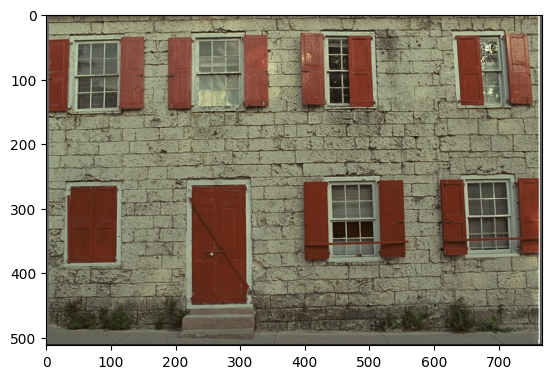

In [45]:
# img = cv2.imread('./test/kodim01.png')
img = Image.open("./test/kodim01.png")
plt.imshow(img)
# plt.imshow(RGB2YUV(img))
# img = cv2.imread('./test/kodim01.png')
# img = cv2.cvtColor(np.asarray(img), cv2.COLOR_BGR2YCrCb)
# cv2.imshow('image', img)
# cv2.waitKey(0)

In [26]:
# cv2.imshow('hey',img)
# cv2.waitKey(0)

In [46]:
# tiles = np.zeros((4, 2, 2, 3))

nparray = np.asarray(img)
print(nparray.shape)

(512, 768, 3)


In [47]:
# def RGB2YUV(rgb_image):
#     matrix = np.array([[ 0.29900, -0.16874,  0.50000],
#                  [0.58700, -0.33126, -0.41869],
#                  [ 0.11400, 0.50000, -0.08131]])

#     yuv_image = np.dot(rgb_image, matrix)
#     yuv_image[:,:,1:]+=128.0
# #     yuv_image[:,:,0]+=16
#     return yuv_image

# def YUV2RGB(yuv_image):

#     matrix = np.array([[ 1.0, 1.0, 1.0],
#                  [-0.000007154783816076815, -0.3441331386566162, 1.7720025777816772],
#                  [ 1.4019975662231445, -0.7141380310058594 , 0.00001542569043522235] ])

#     rgb_image = np.dot(yuv_image,matrix)
#     rgb_image[:,:,0]-=179.45477266423404
#     rgb_image[:,:,1]+=135.45870971679688
#     rgb_image[:,:,2]-=226.8183044444304
#     return rgb_image


def RGB2YUV(rgb):
    m = np.array([[0.29900, -0.147108, 0.614777], [0.58700, -0.288804, -0.514799], [0.11400, 0.435912, -0.099978]])
    yuv = np.dot(rgb, m)
    yuv[:, :, 1:] += 0.5
    return yuv


def YUV2RGB(yuv):
    m = np.array(
        [
            [1.000, 1.000, 1.000],
            [0.000, -0.394, 2.032],
            [1.140, -0.581, 0.000],
        ]
    )
    yuv[:, :, 1:] -= 0.5
    rgb = np.dot(yuv, m)
    return rgb


matic = np.array([[[7, 8, 9], [10, 11, 12], [13, 14, 15]]])
# print(RGB2YUV(matic))
# plt.imshow(nparray)
# plt.imshow(np.int32(YUV2RGB(RGB2YUV(nparray))))

In [48]:
yuv = RGB2YUV(nparray)

In [49]:
print(yuv.shape)

(512, 768, 3)


In [50]:
q_matrix = np.array(
    [
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99],
    ]
)
print(q_matrix)

[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]


In [51]:
image = yuv
image = np.float32(np.int32(image))

tile = np.zeros((8, 8, 3))
tiles = []
# print(tiles[0].?, )

c = 0

for i in range(0, image.shape[0], 8):
    for j in range(0, image.shape[1], 8):
        for k in range(0, image.shape[2]):
            tile = image[i : i + 8, j : j + 8, k]
            tiles.append(tile)
            c += 1


encoded_input = []

for tmp_tile in tiles:
    t_img_1 = np.int32(tmp_tile + 128)
    #     print(np.int32(tiles[0]+128))
    dct_image = cv2.dct(tmp_tile, cv2.DCT_INVERSE)
    # print(dct_image)
    out = np.divide(dct_image, q_matrix)
    #     print(np.int32(out))
    #     print(out)
    out = np.int32(out)
    encoded_input.append(out)
#     break

num_coeffs = 2
# reduced_dct_coeffs = [zig_zag(block, num_coeffs) for block in encoded_input]

# print(encoded_input[0])
# print(reduced_dct_coeffs[0])

# print(reconstruct_zig_zag(reduced_dct_coeffs[0], num_coeffs, 8))

decoded_output = []

for inp in encoded_input:
    # Decode
    tmp_image = np.multiply(inp, q_matrix)
    tmp_image = np.float32(tmp_image)
    img1 = cv2.idct(tmp_image)
    #     print(np.int32(img1+128))
    t_img_2 = np.int32(img1 + 128)

    decoded_output.append(img1)
#     break
#     break

# print(t_img_1)
# print(out)
# print(t_img_2)
# print(c)
print(decoded_output[0:10])

[array([[ 93.80293 ,  96.73209 ,  99.00172 ,  97.860886,  94.78506 ,
         93.644226,  95.91384 ,  98.84301 ],
       [ 99.074326, 101.47823 , 102.777306, 100.368385,  95.91999 ,
         93.51107 ,  94.810135,  97.21404 ],
       [100.16525 , 101.82633 , 101.75283 ,  97.55056 ,  91.161064,
         86.95879 ,  86.8853  ,  88.54638 ],
       [ 96.436646,  97.57247 ,  96.52842 ,  91.05806 ,  83.296   ,
         77.82564 ,  76.78159 ,  77.91741 ],
       [ 96.436646,  97.57247 ,  96.52842 ,  91.05806 ,  83.296   ,
         77.82564 ,  76.78159 ,  77.91741 ],
       [100.16525 , 101.82633 , 101.75283 ,  97.55056 ,  91.161064,
         86.95879 ,  86.8853  ,  88.54638 ],
       [ 99.074326, 101.47823 , 102.777306, 100.368385,  95.91999 ,
         93.51107 ,  94.810135,  97.21404 ],
       [ 93.80293 ,  96.73209 ,  99.00172 ,  97.860886,  94.78506 ,
         93.644226,  95.91384 ,  98.84301 ]], dtype=float32), array([[ 1.9071798 ,  1.6168289 ,  1.0803306 ,  0.37936166, -0.37936166,
     

In [52]:
def zig_zag(array, n=None):
    """
    Return a new array where only the first n subelements in zig-zag order are kept.
    The remaining elements are set to 0.
    :param array: 2D array_like
    :param n: Keep up to n subelements. Default: all subelements
    :return: The new reduced array.
    """

    shape = np.array(array).shape

    assert len(shape) >= 2, "Array must be a 2D array_like"

    if n == None:
        n = shape[0] * shape[1]
    assert 0 <= n <= shape[0] * shape[1], "n must be the number of subelements to return"

    res = []

    (j, i) = (0, 0)
    direction = "r"  # {'r': right, 'd': down, 'ur': up-right, 'dl': down-left}
    for subel_num in range(1, n + 1):
        res.append(array[j][i])
        if direction == "r":
            i += 1
            if j == shape[0] - 1:
                direction = "ur"
            else:
                direction = "dl"
        elif direction == "dl":
            i -= 1
            j += 1
            if j == shape[0] - 1:
                direction = "r"
            elif i == 0:
                direction = "d"
        elif direction == "d":
            j += 1
            if i == 0:
                direction = "ur"
            else:
                direction = "dl"
        elif direction == "ur":
            i += 1
            j -= 1
            if i == shape[1] - 1:
                direction = "d"
            elif j == 0:
                direction = "r"

    return res

In [34]:
def reconstruct_zig_zag(array, n, block_size):
    """Reconstruct"""

    result = np.int32(np.zeros([block_size, block_size]))

    #     print(result)

    #     shape = np.array(array).shape

    #     assert len(shape) >= 2, "Array must be a 2D array_like"

    #     if n == None:
    #         n = shape[0] * shape[1]
    #     assert 0 <= n <= shape[0] * shape[1], 'n must be the number of subelements to return'

    res = []

    shape = (block_size, block_size)

    (j, i) = (0, 0)
    direction = "r"  # {'r': right, 'd': down, 'ur': up-right, 'dl': down-left}
    for subel_num in range(1, n + 1):
        #         res.append(array[j][i])
        #         print(array[subel_num - 1])
        result[j][i] = array[subel_num - 1]
        if direction == "r":
            i += 1
            if j == shape[0] - 1:
                direction = "ur"
            else:
                direction = "dl"
        elif direction == "dl":
            i -= 1
            j += 1
            if j == shape[0] - 1:
                direction = "r"
            elif i == 0:
                direction = "d"
        elif direction == "d":
            j += 1
            if i == 0:
                direction = "ur"
            else:
                direction = "dl"
        elif direction == "ur":
            i += 1
            j -= 1
            if i == shape[1] - 1:
                direction = "d"
            elif j == 0:
                direction = "r"

    return result

In [35]:
sample = np.int32(np.zeros([8, 8]))
sample[1][1] = 4
print(sample)

[[0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [53]:
# print(image.shape)
new_img = np.zeros((image.shape[0], image.shape[1], image.shape[2]))

ct = 0

for i in range(0, image.shape[0], 8):
    for j in range(0, image.shape[1], 8):
        for k in range(0, image.shape[2]):
            new_img[i : i + 8, j : j + 8, k] = decoded_output[ct]
            ct += 1
#             tiles.append(tile)
#             c += 1

# print(new_img)
print(np.int32(YUV2RGB(new_img)))
# plt.imshow(np.int32(YUV2RGB(new_img)))

[[[ 91  94  96]
  [ 94  97  99]
  [ 97  99 100]
  ...
  [ 97  98  99]
  [110 111 110]
  [ 83  84  81]]

 [[ 96  99 101]
  [ 99 102 103]
  [100 103 103]
  ...
  [ 83  84  85]
  [105 106 105]
  [ 92  94  91]]

 [[ 97 101 103]
  [ 99 102 104]
  [ 99 102 102]
  ...
  [ 83  84  85]
  [101 102 101]
  [100 101  99]]

 ...

 [[100 101  99]
  [100 101  99]
  [100 101  99]
  ...
  [106 107 108]
  [106 107 109]
  [108 108 111]]

 [[ 92  93  92]
  [ 92  93  92]
  [ 92  93  92]
  ...
  [ 68  69  70]
  [ 80  80  83]
  [ 69  69  72]]

 [[  3   5   3]
  [  3   5   3]
  [  3   5   3]
  ...
  [  2   3   4]
  [ 23  24  26]
  [  5   5   8]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


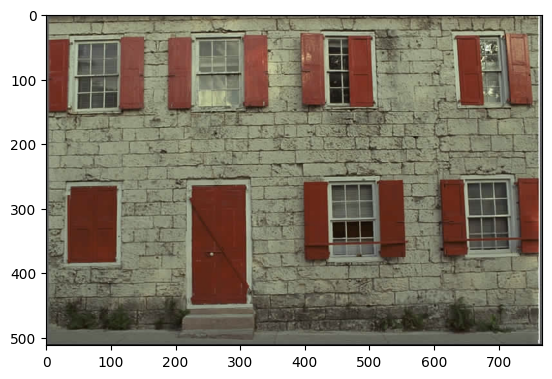

In [54]:
new_img_decoded = np.zeros((image.shape[0], image.shape[1], image.shape[2]))

ct = 0

for i in range(0, image.shape[0], 8):
    for j in range(0, image.shape[1], 8):
        for k in range(0, image.shape[2]):
            new_img_decoded[i : i + 8, j : j + 8, k] = decoded_output[ct]
            ct += 1
#             tiles.append(tile)
#             c += 1

# print(new_img)
plt.imshow(np.int32(YUV2RGB(new_img_decoded)))

In [60]:
def calculateRMSE(inp, out, width, height):
    rmse = 0
    for k in range(0, len(inp)):
        for i in range(0, inp[k].shape[0]):
            for j in range(0, inp[k].shape[1]):
                val = abs(inp[k][i][j] - out[k][i][j])
                val = val**2
                rmse += val

    rmse = rmse / (width * height)
    rmse = math.sqrt(rmse)
    return rmse


# print(new_img)
print(calculateRMSE(new_img, image, image.shape[0], image.shape[1]))
# print(image.shape)

9.972783821483896


In [39]:
def calculateRMSEimage(img1, img2):
#     print(img1)
#     print(img2)
    rmse = 0
    for i in range(0, img1.shape[0]):
        for j in range(0, img1.shape[1]):
            for k in range
            val = (abs(img1[i][j]-img2[i][j]))
            val = val**2
            rmse += val
     
    rmse = rmse/(img1.shape[0]*img1.shape[1])
    print(rmse)
    rmse = math.sqrt(rmse)
    return rmse
# print(calculateRMSEimage(t_img_1, t_img_2))
print(calculateRMSEimage(new_img, new_img_decoded))  

SyntaxError: expected ':' (34665616.py, line 7)

In [ ]:
image = yuv - 128

img_blocks = [
    image[j : j + 8, i : i + 8]
    for (j, i) in itertools.product(range(0, image.shape[0], 8), range(0, image.shape[1], 8))
]

for img_block in img_blocks:
    img_block = np.float32(np.int32(image))
    #     print(img_block)
    dct_block = cv2.dct(img_block, cv2.DCT_INVERSE)